In [3]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

D:\Anaconda4.3.0\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()

In [5]:
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

In [6]:
x_Train_normalize=x_Train/ 255
x_Test_normalize=x_Test/ 255

In [7]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model=Sequential()

In [10]:
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

In [11]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4377 - acc: 0.8829 - val_loss: 0.2182 - val_acc: 0.9406
Epoch 2/10
 - 1s - loss: 0.1909 - acc: 0.9455 - val_loss: 0.1558 - val_acc: 0.9555
Epoch 3/10
 - 1s - loss: 0.1355 - acc: 0.9616 - val_loss: 0.1260 - val_acc: 0.9652
Epoch 4/10
 - 1s - loss: 0.1027 - acc: 0.9701 - val_loss: 0.1121 - val_acc: 0.9680
Epoch 5/10
 - 1s - loss: 0.0811 - acc: 0.9772 - val_loss: 0.0982 - val_acc: 0.9723
Epoch 6/10
 - 1s - loss: 0.0660 - acc: 0.9817 - val_loss: 0.0937 - val_acc: 0.9716
Epoch 7/10
 - 1s - loss: 0.0544 - acc: 0.9853 - val_loss: 0.0912 - val_acc: 0.9733
Epoch 8/10
 - 1s - loss: 0.0458 - acc: 0.9876 - val_loss: 0.0826 - val_acc: 0.9760
Epoch 9/10
 - 1s - loss: 0.0380 - acc: 0.9902 - val_loss: 0.0823 - val_acc: 0.9760
Epoch 10/10
 - 1s - loss: 0.0316 - acc: 0.9920 - val_loss: 0.0808 - val_acc: 0.9765


In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

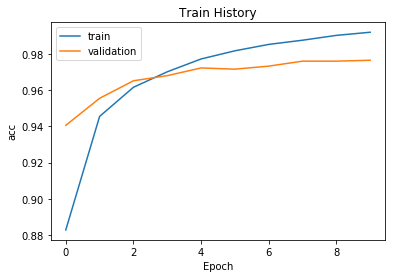

In [16]:
show_train_history(train_history,'acc','val_acc')

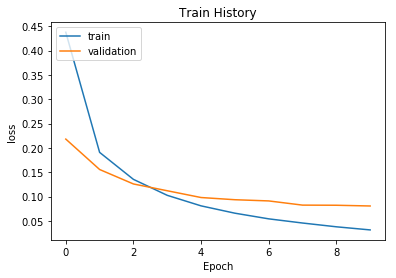

In [17]:
show_train_history(train_history,'loss','val_loss')

In [18]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 22us/step

accuracy= 0.9766


In [19]:
prediction=model.predict_classes(x_Test)

In [20]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [24]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

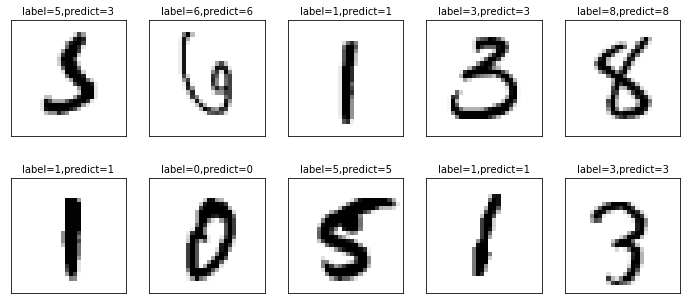

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [26]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,1,1,0,2,4,9,0
3,0,0,3,994,0,1,0,3,5,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,16,1,853,7,1,8,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,14,6,1,0,0,989,5,8
8,4,0,3,5,1,1,1,2,956,1


In [28]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [30]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


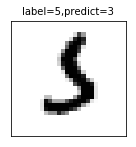

In [32]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

In [43]:
model = Sequential()

In [50]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [51]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [52]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              11000     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10010     
Total params: 821,406
Trainable params: 821,406
Non-trainable params: 0
_________________________________________________________________
None

In [53]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 8s - loss: 1.5366 - acc: 0.3719 - val_loss: 0.9551 - val_acc: 0.5091
Epoch 2/10
 - 8s - loss: 0.6405 - acc: 0.7508 - val_loss: 0.3069 - val_acc: 0.9352
Epoch 3/10
 - 8s - loss: 0.2010 - acc: 0.9527 - val_loss: 0.1762 - val_acc: 0.9550
Epoch 4/10
 - 7s - loss: 0.1085 - acc: 0.9717 - val_loss: 0.1434 - val_acc: 0.9626
Epoch 5/10
 - 7s - loss: 0.0708 - acc: 0.9823 - val_loss: 0.1326 - val_acc: 0.9669
Epoch 6/10
 - 7s - loss: 0.0557 - acc: 0.9850 - val_loss: 0.1067 - val_acc: 0.9729
Epoch 7/10
 - 7s - loss: 0.0392 - acc: 0.9904 - val_loss: 0.1257 - val_acc: 0.9690
Epoch 8/10
 - 8s - loss: 0.0347 - acc: 0.9912 - val_loss: 0.1468 - val_acc: 0.9671
Epoch 9/10
 - 8s - loss: 0.0330 - acc: 0.9914 - val_loss: 0.1764 - val_acc: 0.9653
Epoch 10/10
 - 8s - loss: 0.0321 - acc: 0.9915 - val_loss: 0.1197 - val_acc: 0.9734


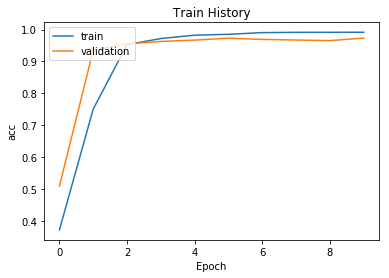

In [55]:
show_train_history(train_history,'acc','val_acc')

In [56]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 104us/step

accuracy= 0.9729


In [57]:
from keras.layers import Dropout

In [58]:
model = Sequential()

In [59]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [60]:
model.add(Dropout(0.5))

In [61]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [62]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 8s - loss: 0.3533 - acc: 0.8944 - val_loss: 0.1623 - val_acc: 0.9546
Epoch 2/10
 - 8s - loss: 0.1596 - acc: 0.9532 - val_loss: 0.1181 - val_acc: 0.9652
Epoch 3/10
 - 8s - loss: 0.1152 - acc: 0.9664 - val_loss: 0.0977 - val_acc: 0.9701
Epoch 4/10
 - 8s - loss: 0.0912 - acc: 0.9730 - val_loss: 0.0878 - val_acc: 0.9724
Epoch 5/10
 - 7s - loss: 0.0745 - acc: 0.9773 - val_loss: 0.0800 - val_acc: 0.9764
Epoch 6/10
 - 8s - loss: 0.0640 - acc: 0.9798 - val_loss: 0.0757 - val_acc: 0.9778
Epoch 7/10
 - 8s - loss: 0.0550 - acc: 0.9834 - val_loss: 0.0745 - val_acc: 0.9785
Epoch 8/10
 - 8s - loss: 0.0461 - acc: 0.9856 - val_loss: 0.0718 - val_acc: 0.9788
Epoch 9/10
 - 8s - loss: 0.0415 - acc: 0.9870 - val_loss: 0.0688 - val_acc: 0.9800
Epoch 10/10
 - 8s - loss: 0.0368 - acc: 0.9886 - val_loss: 0.0675 - val_acc: 0.9805


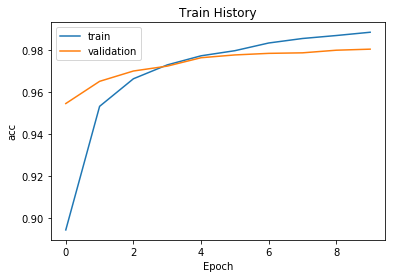

In [65]:
show_train_history(train_history,'acc','val_acc')

In [66]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 81us/step

accuracy= 0.9825


In [67]:
model = Sequential()

In [68]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [69]:
model.add(Dropout(0.5))

In [70]:
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))

In [71]:
model.add(Dropout(0.5))

In [72]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [73]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 18s - loss: 0.3736 - acc: 0.8838 - val_loss: 0.1332 - val_acc: 0.9598
Epoch 2/10
 - 18s - loss: 0.1601 - acc: 0.9502 - val_loss: 0.0997 - val_acc: 0.9694
Epoch 3/10
 - 18s - loss: 0.1208 - acc: 0.9634 - val_loss: 0.0880 - val_acc: 0.9727
Epoch 4/10
 - 18s - loss: 0.0981 - acc: 0.9694 - val_loss: 0.0782 - val_acc: 0.9764
Epoch 5/10
 - 18s - loss: 0.0822 - acc: 0.9739 - val_loss: 0.0755 - val_acc: 0.9781
Epoch 6/10
 - 19s - loss: 0.0768 - acc: 0.9751 - val_loss: 0.0742 - val_acc: 0.9781
Epoch 7/10
 - 19s - loss: 0.0690 - acc: 0.9778 - val_loss: 0.0778 - val_acc: 0.9782
Epoch 8/10
 - 18s - loss: 0.0593 - acc: 0.9811 - val_loss: 0.0693 - val_acc: 0.9803
Epoch 9/10
 - 18s - loss: 0.0555 - acc: 0.9822 - val_loss: 0.0763 - val_acc: 0.9801
Epoch 10/10
 - 18s - loss: 0.0543 - acc: 0.9824 - val_loss: 0.0694 - val_acc: 0.9802


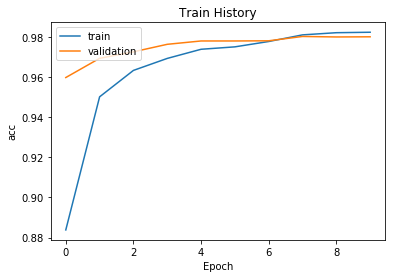

In [76]:
show_train_history(train_history,'acc','val_acc')

In [77]:
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 177us/step

accuracy= 0.98
